<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
for col in ['Employment', 'RemoteWork']:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

missing_jobsat = df['JobSat'].isnull().sum()
total_rows = len(df)

if missing_jobsat / total_rows < 0.1:
    mode_jobsat = df['JobSat'].mode()[0]
    df['JobSat'] = df['JobSat'].fillna(mode_jobsat)
else:
    df = df.dropna(subset=['JobSat'])

print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


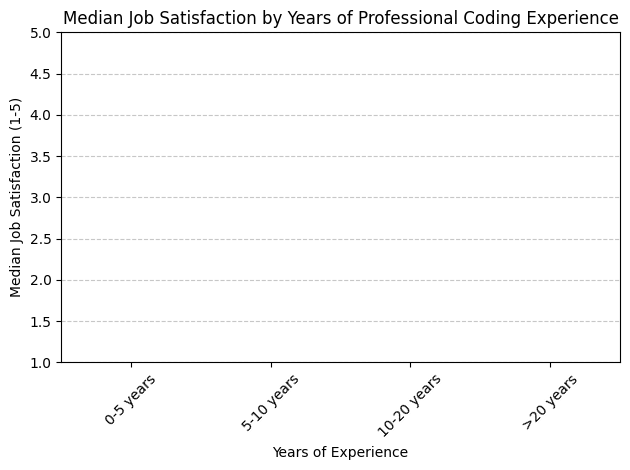

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert YearsCodePro to numeric, coercing errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing YearsCodePro or JobSat
df_filtered = df[['YearsCodePro', 'JobSat']].dropna()

# Map JobSat to numeric scores for median calculation
# Assuming JobSat has these categories — adjust if different:
job_sat_map = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
}
df_filtered['JobSatNumeric'] = df_filtered['JobSat'].map(job_sat_map)

# Define experience bins and labels
bins = [0, 5, 10, 20, np.inf]
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years']

# Create experience range column
df_filtered['ExperienceRange'] = pd.cut(df_filtered['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSatNumeric by experience range
median_satisfaction = df_filtered.groupby('ExperienceRange', observed=True)['JobSatNumeric'].median()


# Plot the median job satisfaction by experience range
median_satisfaction.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Median Job Satisfaction (1-5)')
plt.xticks(rotation=45)
plt.ylim(1, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


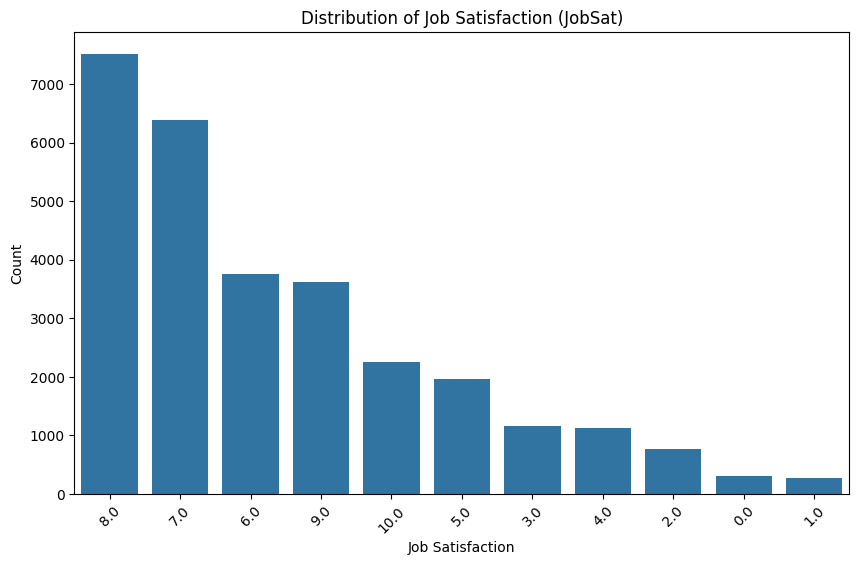

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction (JobSat)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


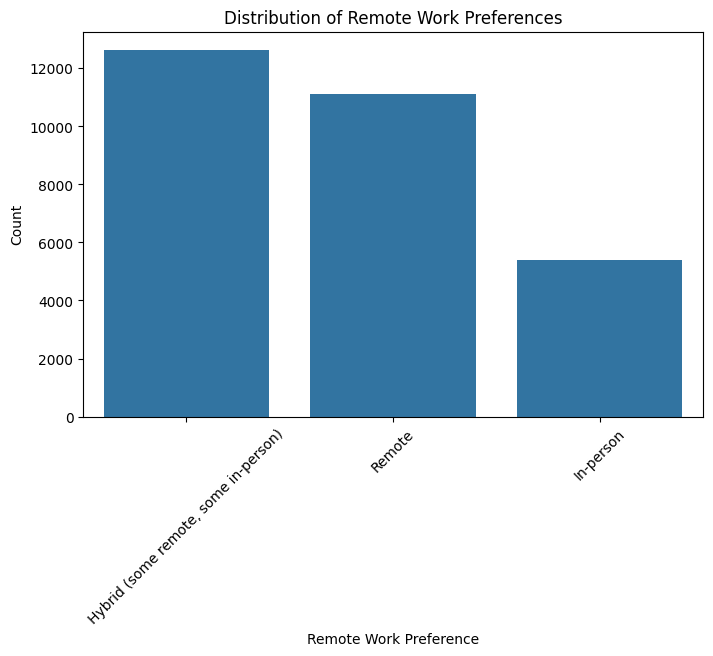

RemoteWork                                                         Hybrid (some remote, some in-person)  \
Employment          DevType                                                                               
Employed, full-time Academic researcher                                                       60.507246   
                    Blockchain                                                                17.241379   
                    Cloud infrastructure engineer                                             40.476190   
                    Data engineer                                                             51.330798   
                    Data or business analyst                                                  52.459016   
                    Data scientist or machine learning specialist                             55.637255   
                    Database administrator                                                    38.461538   
                    Designer         

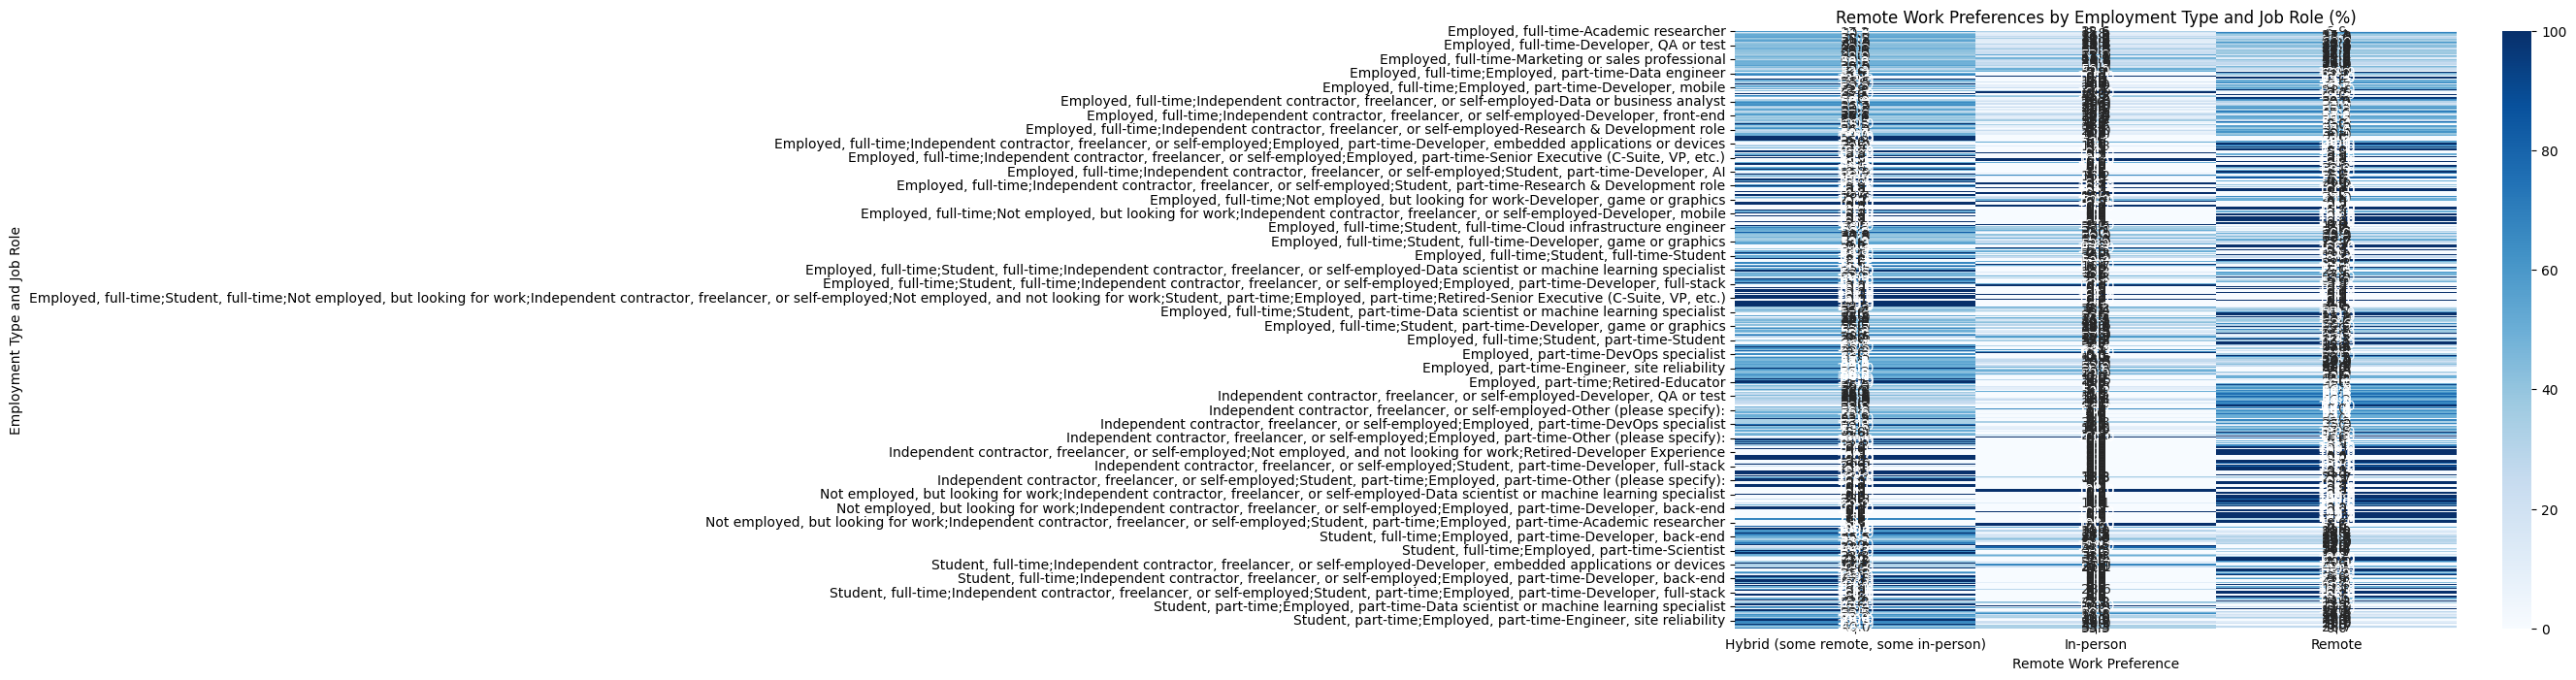

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for RemoteWork distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Cross-tabulate RemoteWork by Employment and JobRole
# (Assuming Employment and DevType columns represent employment type and job role respectively)

# Some datasets might have multiple job roles in DevType separated by semicolons, 
# so split and explode them if necessary. Otherwise, just use DevType directly.

# If DevType has multiple roles separated by semicolons:
if 'DevType' in df.columns:
    df_exp = df[['RemoteWork', 'Employment', 'DevType']].dropna()
    df_exp = df_exp.assign(DevType=df_exp['DevType'].str.split(';')).explode('DevType')
    crosstab = pd.crosstab([df_exp['Employment'], df_exp['DevType']], df_exp['RemoteWork'], normalize='index') * 100
    print(crosstab.head(10))  # Show a snippet of the crosstab

else:
    crosstab = pd.crosstab(df['Employment'], df['RemoteWork'], normalize='index') * 100
    print(crosstab)

# Optional: Visualize a heatmap of this crosstab for easier analysis
plt.figure(figsize=(12,8))
sns.heatmap(crosstab, annot=True, fmt=".1f", cmap='Blues')
plt.title('Remote Work Preferences by Employment Type and Job Role (%)')
plt.ylabel('Employment Type and Job Role')
plt.xlabel('Remote Work Preference')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


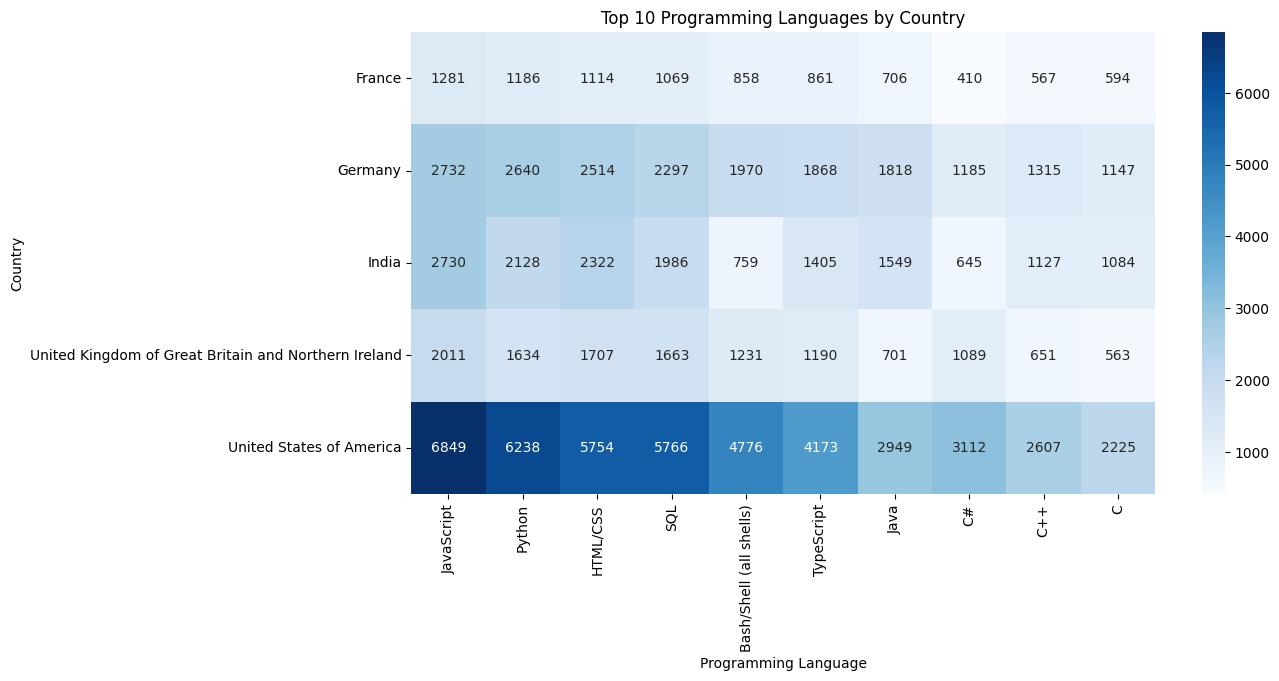

/tmp/ipykernel_786/3435906772.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x='Count', y='Language', palette='viridis')


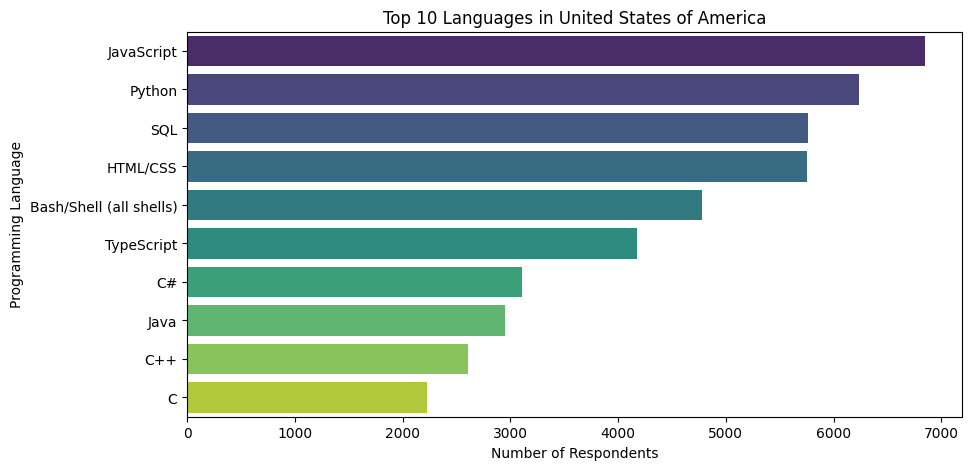

/tmp/ipykernel_786/3435906772.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x='Count', y='Language', palette='viridis')


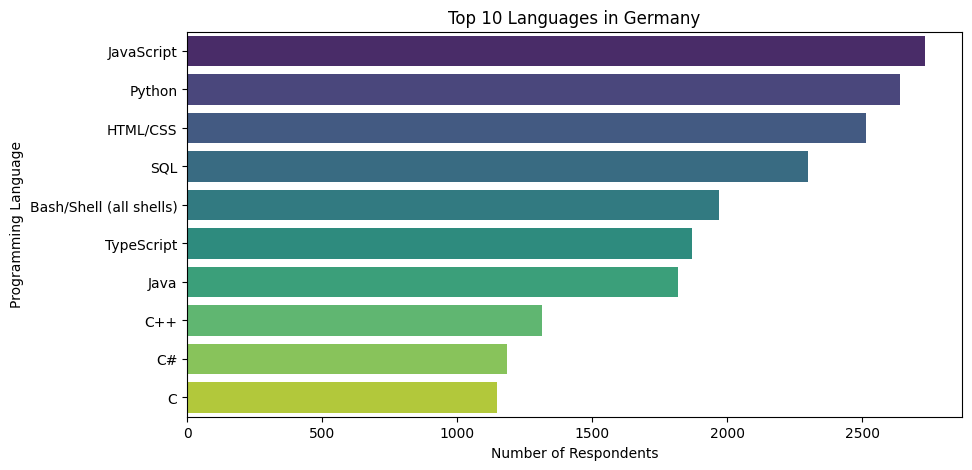

/tmp/ipykernel_786/3435906772.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x='Count', y='Language', palette='viridis')


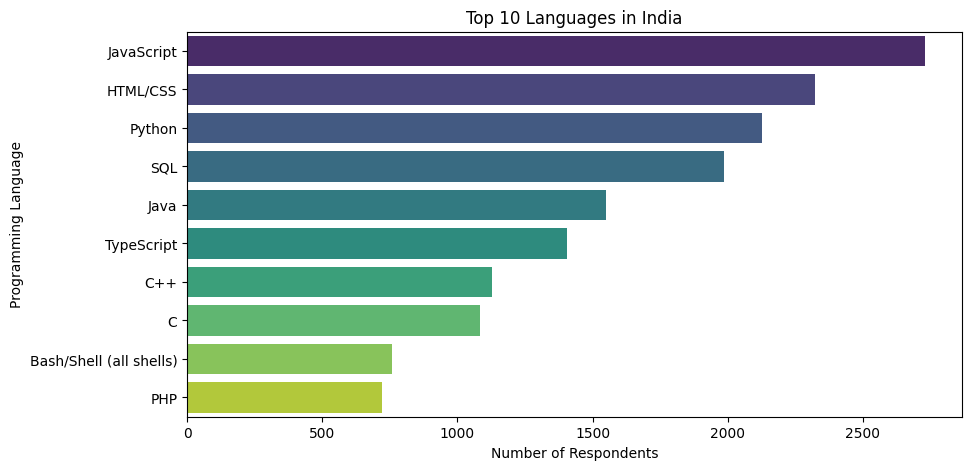

/tmp/ipykernel_786/3435906772.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x='Count', y='Language', palette='viridis')


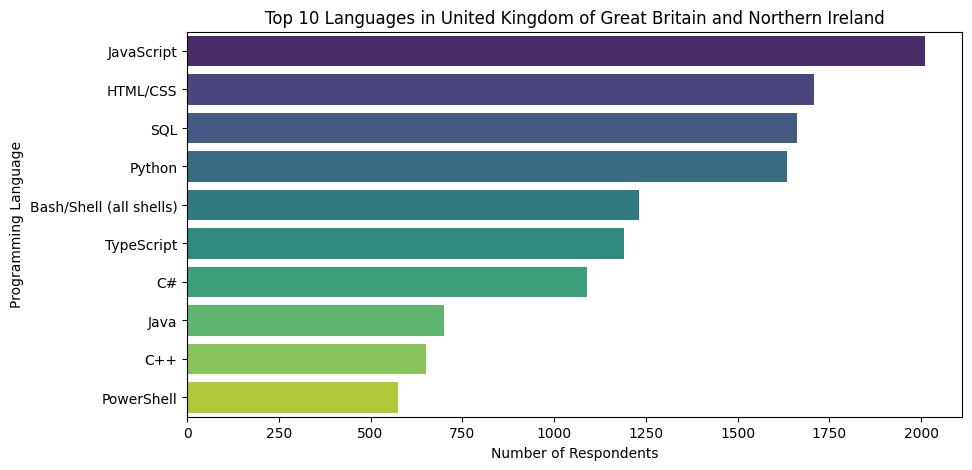

/tmp/ipykernel_786/3435906772.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x='Count', y='Language', palette='viridis')


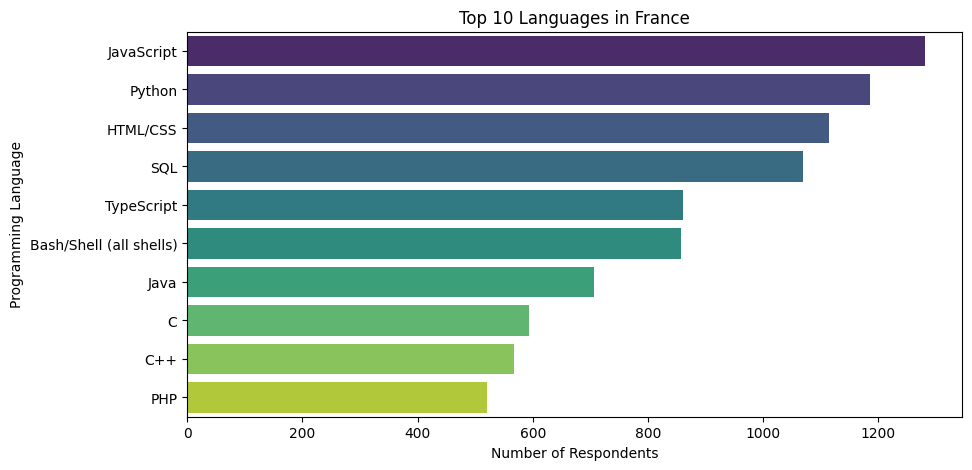

In [19]:
# Use 'Country' instead of 'Region'
df_clean = df.dropna(subset=['Country', 'LanguageHaveWorkedWith'])

df_exploded = df_clean.assign(Language=df_clean['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

df_exploded['Language'] = df_exploded['Language'].str.strip()

top_countries = df_exploded['Country'].value_counts().nlargest(5).index.tolist()
df_filtered = df_exploded[df_exploded['Country'].isin(top_countries)]

language_counts = df_filtered.groupby(['Country', 'Language']).size().reset_index(name='Count')

language_pivot = language_counts.pivot(index='Country', columns='Language', values='Count').fillna(0)

language_pivot = language_pivot[language_pivot.sum().sort_values(ascending=False).index]

top_10_languages = language_pivot.sum().nlargest(10).index
language_pivot_top10 = language_pivot[top_10_languages]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(language_pivot_top10, annot=True, fmt='g', cmap='Blues')
plt.title('Top 10 Programming Languages by Country')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.show()

for country in top_countries:
    region_data = language_counts[language_counts['Country'] == country].sort_values('Count', ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(data=region_data, x='Count', y='Language', palette='viridis')
    plt.title(f'Top 10 Languages in {country}')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Programming Language')
    plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


Columns available: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAs

/tmp/ipykernel_786/622127302.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['YearsCodePro_num'] = df_clean['YearsCodePro'].apply(convert_years)


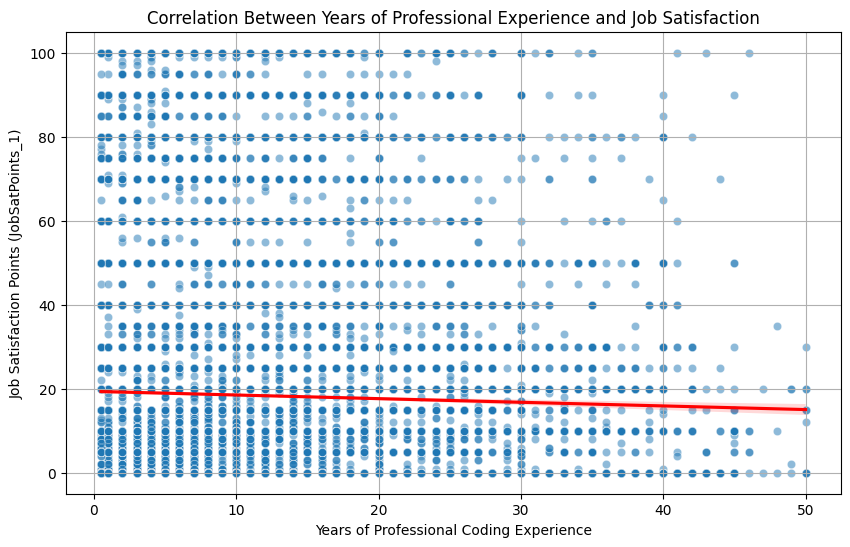

Pearson correlation coefficient: -0.028


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset if not loaded yet
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Check if required columns exist
print("Columns available:", df.columns.tolist())

# Drop rows with missing values in 'YearsCodePro' or 'JobSatPoints_1'
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Inspect sample data
print(df_clean[['YearsCodePro', 'JobSatPoints_1']].head())

# Convert 'YearsCodePro' to numeric if needed (some surveys have 'Less than 1 year', 'More than 50 years', etc.)
def convert_years(x):
    if isinstance(x, str):
        if 'Less than' in x:
            return 0.5
        elif 'More than' in x:
            # e.g. "More than 50 years"
            try:
                return float(x.split()[-2])
            except:
                return None
        else:
            try:
                return float(x)
            except:
                return None
    else:
        return x

df_clean['YearsCodePro_num'] = df_clean['YearsCodePro'].apply(convert_years)

# Drop rows where conversion failed
df_clean = df_clean.dropna(subset=['YearsCodePro_num'])

# Plot scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='YearsCodePro_num', y='JobSatPoints_1', alpha=0.5)

# Optional: add regression line
sns.regplot(data=df_clean, x='YearsCodePro_num', y='JobSatPoints_1', scatter=False, color='red')

plt.title('Correlation Between Years of Professional Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points (JobSatPoints_1)')
plt.grid(True)
plt.show()

# Optional: compute correlation coefficient
corr = df_clean['YearsCodePro_num'].corr(df_clean['JobSatPoints_1'])
print(f"Pearson correlation coefficient: {corr:.3f}")

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

/tmp/ipykernel_786/2424086811.py:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


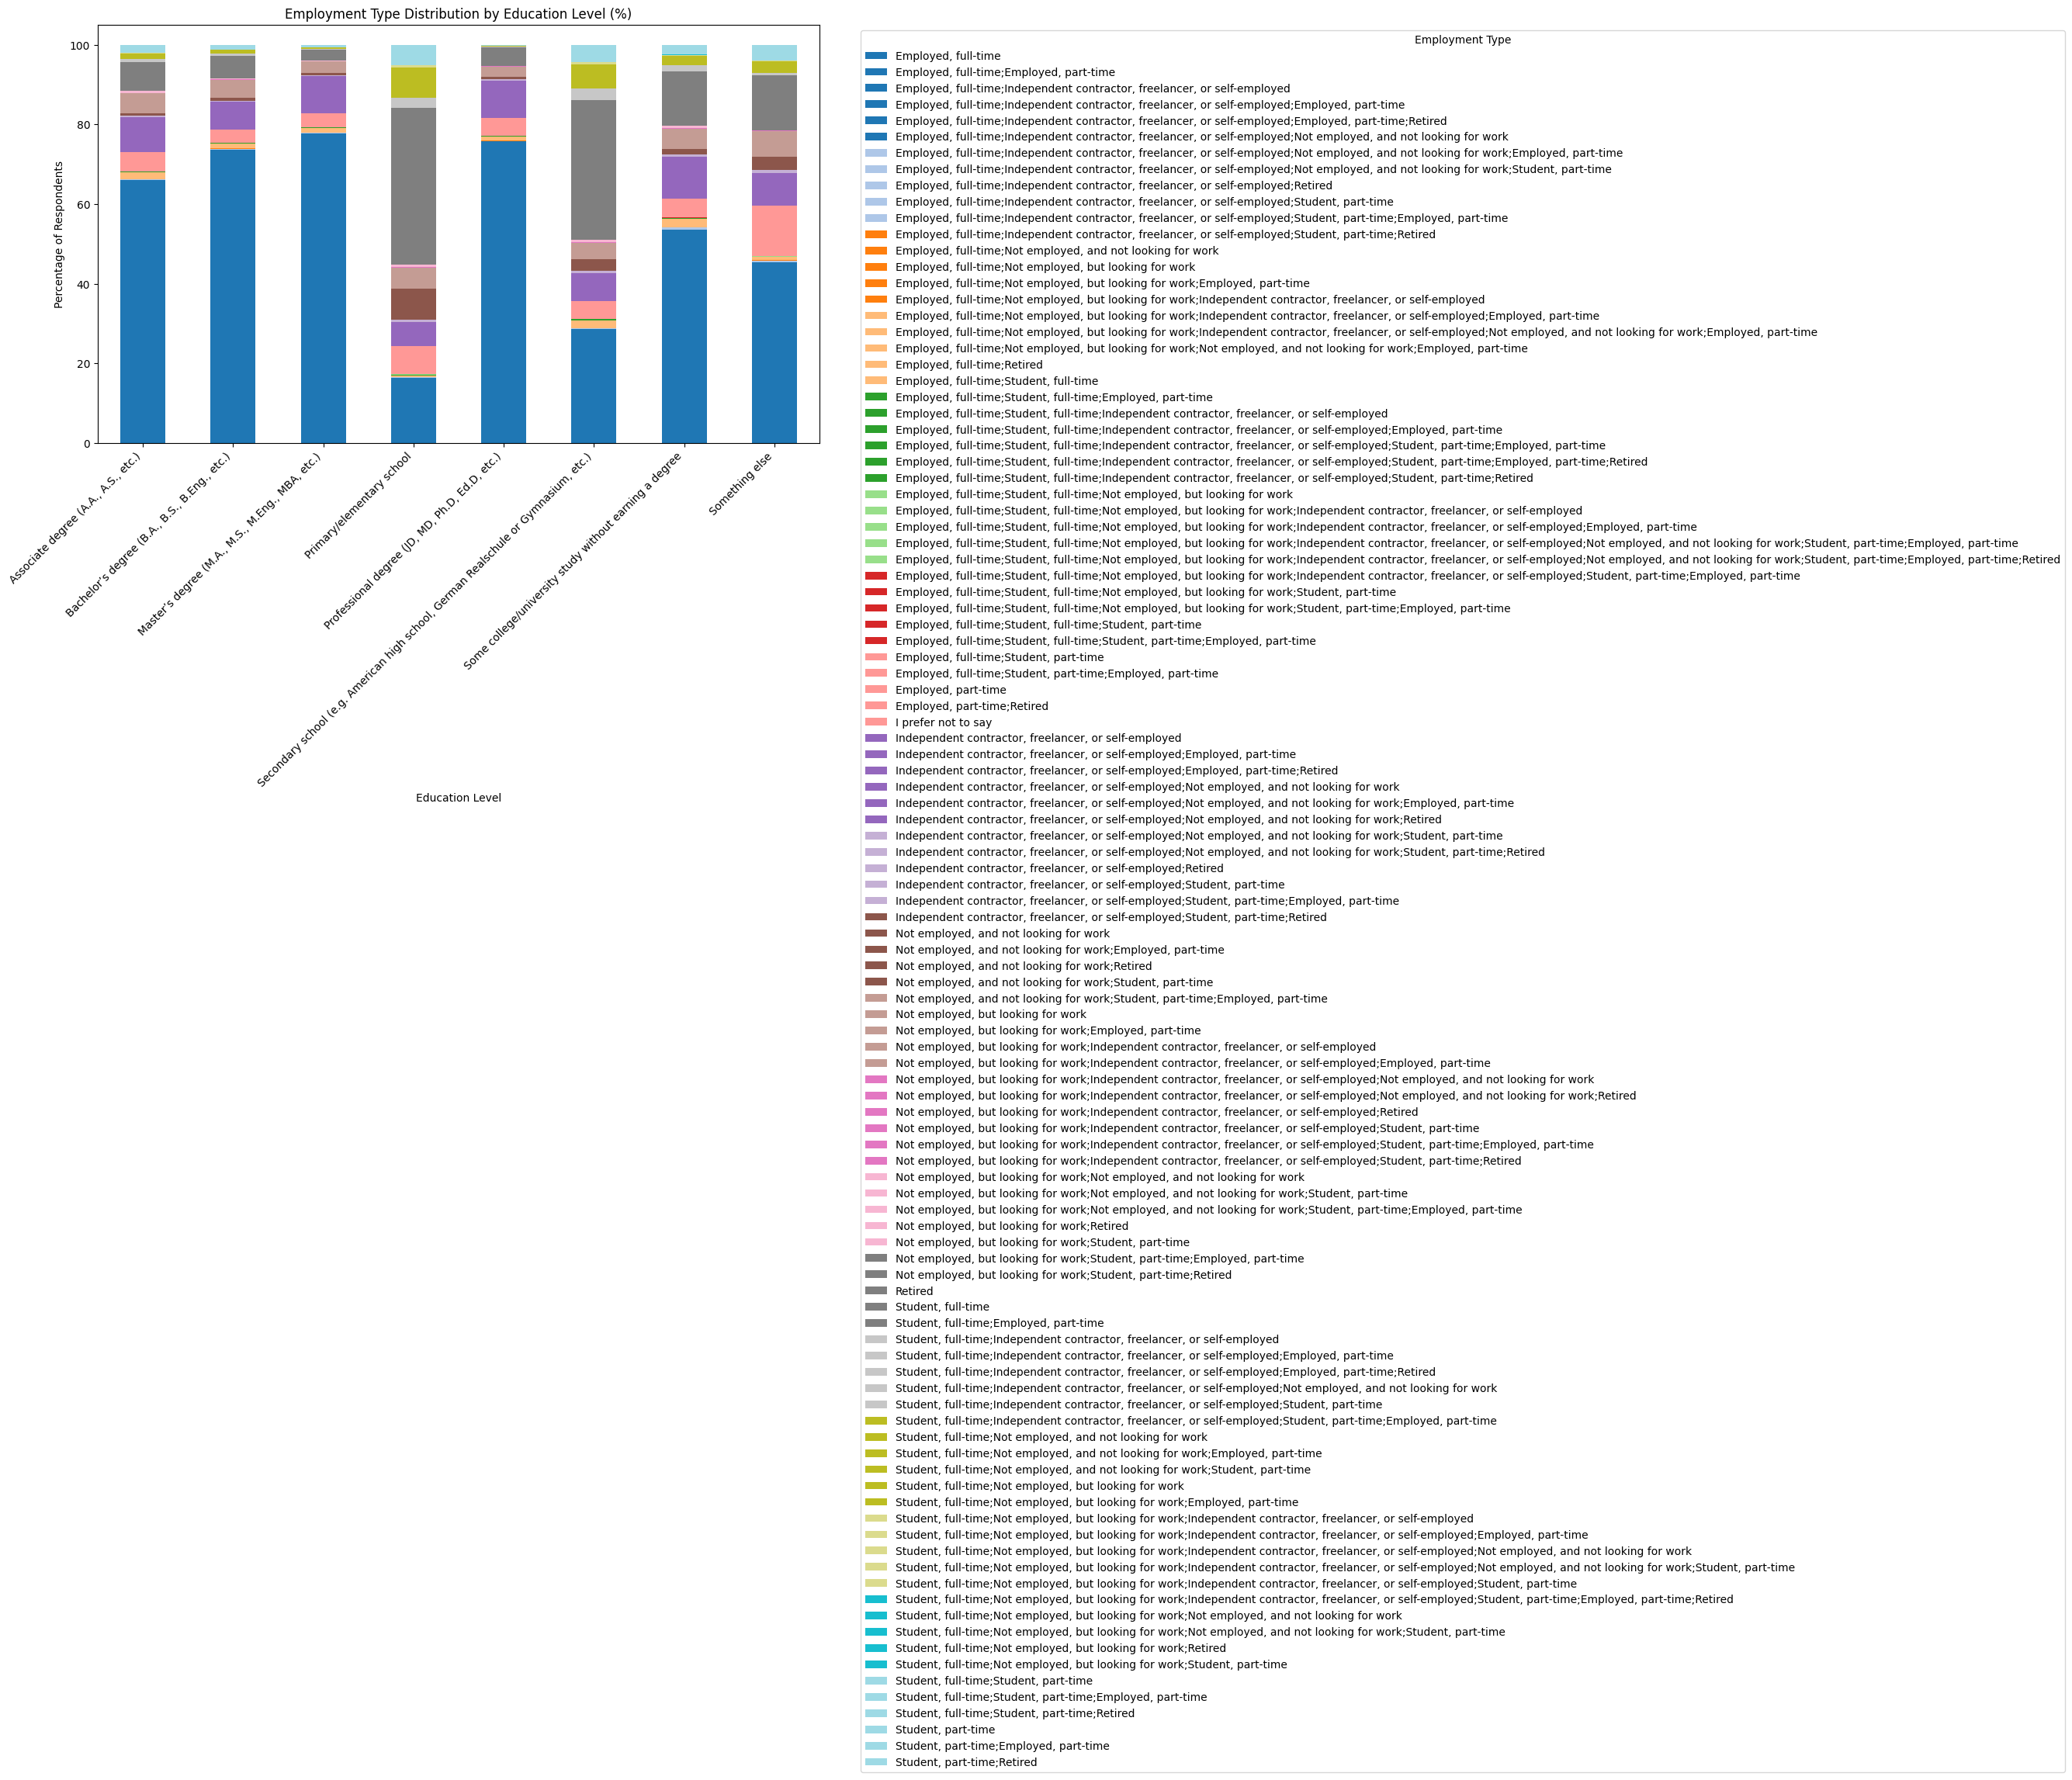

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset if not loaded yet
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Check column names
print(df.columns.tolist())

# Drop rows with missing 'EdLevel' or 'Employment'
df_clean = df.dropna(subset=['EdLevel', 'Employment'])

# Cross-tabulation of Education Level vs Employment Type
crosstab = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'], normalize='index') * 100

print(crosstab.round(2))

# Plot stacked bar chart to show distribution of Employment by Education level
crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Employment Type Distribution by Education Level (%)')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [22]:
# Save the cleaned DataFrame to a CSV file
df_clean.to_csv('cleaned_survey_data.csv', index=False)

print("Cleaned dataset saved to 'cleaned_survey_data.csv'")

Cleaned dataset saved to 'cleaned_survey_data.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
